In [4]:
import math
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
style.use('ggplot')
tata = pdr.get_data_yahoo('TATAMOTORS.NS', start = '2009-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
tata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,34.430695,36.092869,33.757912,34.836346,32.157669,18566132
2009-01-05,36.607349,36.607349,34.638466,35.311253,32.596058,13382037
2009-01-06,35.608067,37.388966,34.737408,36.894272,34.057358,18622646
2009-01-07,37.398857,37.398857,33.451202,34.460377,31.810604,8271220
2009-01-09,35.617962,35.617962,31.106354,32.798206,30.276247,11836652


In [6]:
time_elapsed = (tata.index[-1]-tata.index[0]).days
print(time_elapsed)

4588


In [8]:
Agg_growth = (tata['Adj Close'][-1]/tata['Adj Close'][1]) #total growth
year_equi = time_elapsed / 365
CAGR = (Agg_growth**(1/year_equi))-1
std_dev = tata['Adj Close'].pct_change().std()
trd_days = 252
std_dev_scaled = std_dev * math.sqrt(trd_days)

print(f"CAGR(Mean Annual Returns): {round(CAGR,3)}")
print(f"Standard deviation: {round(std_dev_scaled,3)}")

CAGR(Mean Annual Returns): 0.191
Standard deviation: 0.457


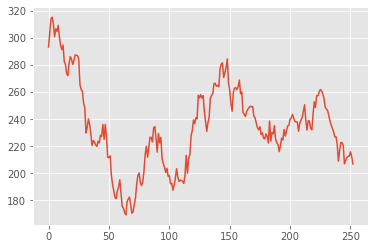

In [11]:
#set to input random value and run the MC simulation
#generating random values for 1 year and normal distribution is used to generate them
daily_return_rand = np.random.normal(CAGR/trd_days,std_dev,trd_days)+1

price_series = [tata['Adj Close'][-1]]
for j in daily_return_rand:
    price_series.append(price_series[-1]*j)
    
plt.plot(price_series)
plt.show()

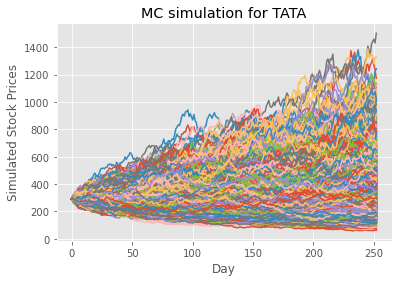

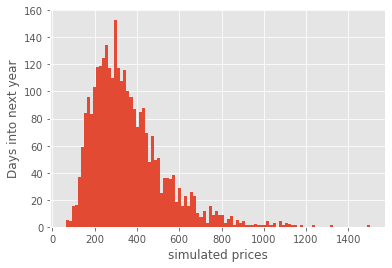

In [13]:
#above is a single random walk, generating large number of times
trials = 3000
closing_prices = []

for i in range(trials):
    daily_return_rand = np.random.normal(CAGR/trd_days,std_dev,trd_days)+1

    price_series = [tata['Adj Close'][-1]]
    for j in daily_return_rand:
        price_series.append(price_series[-1]*j)
    closing_prices.append(price_series[-1])
    
    plt.plot(price_series)
    plt.title('MC simulation for TATA')
    plt.xlabel("Day")
    plt.ylabel("Simulated Stock Prices")
    
plt.show()

#histogram
plt.hist(closing_prices, bins = 100)
plt.xlabel("simulated prices")
plt.ylabel("Days into next year")
plt.show()
    

In [14]:
#calculating mean closing price
mean_close_price = round(np.mean(closing_prices),3)
print(f"Expected price {mean_close_price}")

Expected price 357.811
